## Assignment 1

## Statistical Thinking for DS

## PGCP DSML IITR-Times TSW


### Submitted by - Sylvia Chadha

### Question 1

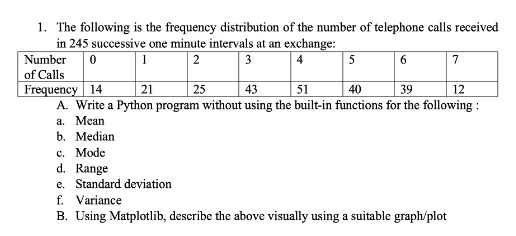

### Solution 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame()
df['x'] = pd.Series([0,1,2,3,4,5,6,7])
df['freq'] = pd.Series([14,21,25,43,51,40,39,12])
df


,x,freq
0,0,14
1,1,21
2,2,25
3,3,43
4,4,51
5,5,40
6,6,39
7,7,12


#### Plot the Data 

- Frequency Distribution is just a shorthand for a long list of numbers. In this case it is shorthand for number of calls recorded for 245 successive 1 minute intervals.
- In this freq distribution we have number of calls (discrete random variable) which can take different values and the count (number of times a particular value of random variable, occurs).


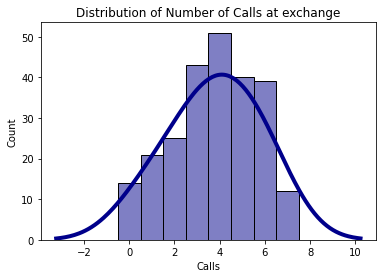

In [4]:
# If discrete=True, default to ``binwidth=1``

hist_plot = sns.histplot(x=df['x'], weights=df['freq'], discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2},line_kws={'linewidth': 4})
hist_plot.set_title('Distribution of Number of Calls at exchange')
hist_plot.set_xlabel('Calls')

hist_plot;

**A. Write Python Program without using Built-in Functions for following-**

**1. Mean**


In [5]:
df['x*freq'] = df['x']*df['freq']
N = sum(df['freq'])

mean = (sum(df['x*freq'])/N) 
print(mean)

mean = round(mean)   # Since number of calls = discrete,appx to 4.
print('Mean/Expected value = ', mean)
df

3.763265306122449
Mean/Expected value =  4


,x,freq,x*freq
0,0,14,0
1,1,21,21
2,2,25,50
3,3,43,129
4,4,51,204
5,5,40,200
6,6,39,234
7,7,12,84


**2. Median**

In [6]:
df['cum_freq'] = df['freq'].cumsum()

df

,x,freq,x*freq,cum_freq
0,0,14,0,14
1,1,21,21,35
2,2,25,50,60
3,3,43,129,103
4,4,51,204,154
5,5,40,200,194
6,6,39,234,233
7,7,12,84,245


In [7]:
print('Middle value',N/2)

Middle value 122.5


Filter df on cum_freq > N/2 (middle vale) & pick 1st row using head(1).

In [8]:
val = df[df['cum_freq'] > N/2].head(1)
print(val)
print('Median = ', val.iloc[0,0])


   x  freq  x*freq  cum_freq
4  4    51     204       154
Median =  4


**3. Mode**

In [9]:
max_freq = max(df['freq'])
print(max_freq)

df_filter = df[df['freq'] == max_freq]
mode = df_filter.loc[4,'x']
print('Mode is', mode)


51
Mode is 4


**4. Range**

In [10]:
no_of_call_max = max(df['x'])
no_of_call_min = min(df['x'])
range1 = no_of_call_max - no_of_call_min
print('Range = ',range1)

Range =  7


**5. Variance** 

In [11]:
df['(x-xbar)'] = df['x'].subtract(mean)
df['(x-xbar)^2'] = df['(x-xbar)']**2
df['f*(x-xbar)^2'] = df['freq']*df['(x-xbar)^2']

df


,x,freq,x*freq,cum_freq,(x-xbar),(x-xbar)^2,f*(x-xbar)^2
0,0,14,0,14,-4,16,224
1,1,21,21,35,-3,9,189
2,2,25,50,60,-2,4,100
3,3,43,129,103,-1,1,43
4,4,51,204,154,0,0,0
5,5,40,200,194,1,1,40
6,6,39,234,233,2,4,156
7,7,12,84,245,3,9,108


In [12]:
variance = sum(df['f*(x-xbar)^2'])/N
variance = round(variance,1)
print('Variance = ', variance)

Variance =  3.5


**6. Standard Deviation**

In [13]:
import math
std = math.sqrt(variance) 
std = round(std,1)
print('Standard Deviation = ',std)

Standard Deviation =  1.9


### Question 2

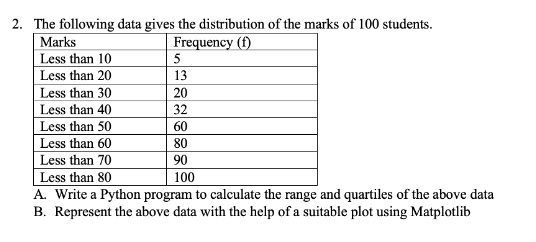

**Quartiles**<br>
- The quartile Q1/lower quartile is 25% mark given by n/4. It is value under which 25% of data points are found when they are arranged in increasing order.
- The quartile Q2/median is 50% mark given by 2n/4. It is value under which 50% of data points are found when they are arranged in increasing order.
- The quartile Q3/upper quartile is 75% mark given by 3n/4.It is the value under which 75% of data points are found when arranged in increasing order.


**Range/IQR**
- Q3-Q1
 

**Using above data, we make a dataframe with 5 columns to get range and quartiles**

1. MySpecificBins
2. lower_bin
3. upper_bin
4. freq
5. cum_freq


In [14]:
df1 = pd.DataFrame()

# Make column for MySpecificBins
simulate = [0,10,20,30,40,50,60,70]
bins = [0,10,20,30,40,50,60,70,80]
df1['MySpecificBins'] = pd.cut(simulate, bins,right=False) 


# Make column for lower_bin, upper_bin
idx = pd.IntervalIndex(df1['MySpecificBins']) 
df1['lower_bin'] = idx.left
df1['upper_bin'] = (idx.right-1)

# Make column for freq
cum_freq = [5,13,20,32,60,80,90,100]
res = [cum_freq[i + 1] - cum_freq[i] for i in range(len(cum_freq)-1)]
to_insert = cum_freq[0]
df1['freq'] = [to_insert, *res]

# Column cum_freq
df1['cum_freq'] = [5,13,20,32,60,80,90,100]
df1   

# In MySpecificBins lower bound included, denoted by '[' & upper not included denoted by ')'

,MySpecificBins,lower_bin,upper_bin,freq,cum_freq
0,"[0, 10)",0,9,5,5
1,"[10, 20)",10,19,8,13
2,"[20, 30)",20,29,7,20
3,"[30, 40)",30,39,12,32
4,"[40, 50)",40,49,28,60
5,"[50, 60)",50,59,20,80
6,"[60, 70)",60,69,10,90
7,"[70, 80)",70,79,10,100


**Quartile cut off points for above data**

In [15]:
N=100   # total observations
q1 = int(1*N/4)
q2 = int(2*N/4)
q3 = int(3*N/4)
print('Q1, Q2 and Q3 out of total observations of 100 are',q1,q2,q3)
w = 10  # class width

Q1, Q2 and Q3 out of total observations of 100 are 25 50 75


**Quartile Classes**

Extract first cumulative frequency that exceeds q1,q2,q3 & corresponding marks class.

In [16]:
q1_class = df1[df1['cum_freq'] > q1].head(1)
q2_class = df1[df1['cum_freq'] > q2].head(1)
q3_class = df1[df1['cum_freq'] > q3].head(1)

print('\nQ1 lies in class\n', q1_class)
print('\nQ2 lies in class\n', q2_class)
print('\nQ3 lies in class\n', q3_class)


Q1 lies in class
   MySpecificBins  lower_bin  upper_bin  freq  cum_freq
3       [30, 40)         30         39    12        32

Q2 lies in class
   MySpecificBins  lower_bin  upper_bin  freq  cum_freq
4       [40, 50)         40         49    28        60

Q3 lies in class
   MySpecificBins  lower_bin  upper_bin  freq  cum_freq
5       [50, 60)         50         59    20        80


**Quartile Values**

In [17]:
# Define Function

def calc_quartiles(q,q_class):
    l = q_class['lower_bin'].iloc[0]
    f = q_class['freq'].iloc[0]
    F = df1['cum_freq'].iloc[q_class.index-1].iloc[0]
    quartile_value = round(l + ((q-F)/f) * w)
    return quartile_value

# l=lower limit of quartile class
# q=quantile cut off point
# F=cum freq distribution of class previous to ith quartile class
# f=req of ith quartile class
# w is class width (bin size)


In [18]:
# Call Function

Q1 = calc_quartiles(q1,q1_class)
Q2 = calc_quartiles(q2,q2_class)
Q3 = calc_quartiles(q3,q3_class)


In [19]:
# Display Results

print(' 25 % of the students score less than or equal to', Q1)
print(' 50 % of the students score less than or equal to', Q2)
print(' 75 % of the students score less than or equal to', Q3)

 25 % of the students score less than or equal to 34
 50 % of the students score less than or equal to 46
 75 % of the students score less than or equal to 58


**Interquartile Range**

In [20]:
IQR = Q3-Q1
IQR

24

In [21]:
max_upper_whisker = Q3+1.5*IQR
print(max_upper_whisker)

94.0


In [22]:
min_lw_whisker = Q1-1.5*IQR
print(min_lw_whisker)

-2.0


**Plot Data using Box and Whisker Plot**

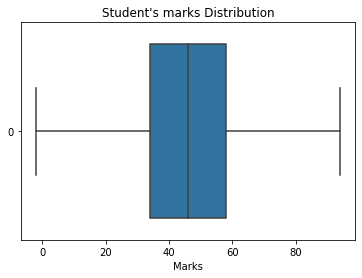

In [23]:
import seaborn as sns

data = [max_upper_whisker, Q1, Q2, Q3, min_lw_whisker]
b_plot = sns.boxplot(data=data, orient="h")
b_plot.set_title("Student's marks Distribution")
b_plot.set_xlabel('Marks');



### Question 3

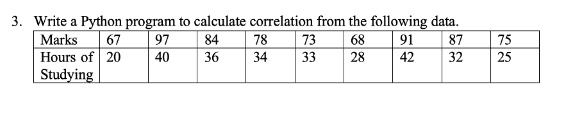

In [24]:
df2 = pd.DataFrame()

df2['marks'] = [67,97,84,78,73,68,91,87,75]
df2['hrs_study'] = [20,40,36,34,33,28,42,32,25]
df2

,marks,hrs_study
0,67,20
1,97,40
2,84,36
3,78,34
4,73,33
5,68,28
6,91,42
7,87,32
8,75,25


**Scatter Plot - Bivariate Analysis**

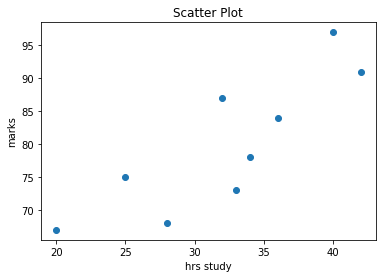

In [25]:
plt.scatter(x=df2['hrs_study'], y=df2['marks']);
plt.xlabel('hrs study')
plt.ylabel('marks');
plt.title('Scatter Plot');

**Covariance**

In [26]:
from numpy import cov

covariance = cov(df2['hrs_study'], df2['marks'])
covariance

array([[ 49.19444444,  61.25      ],
       [ 61.25      , 108.25      ]])

**Pearson's correlation coefficient**

In [27]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df2['hrs_study'], df2['marks'])
round(corr,2)

0.84

Hence variables Hrs_study and marks are positively correlated and have high correlation of 0.8

### Question 4

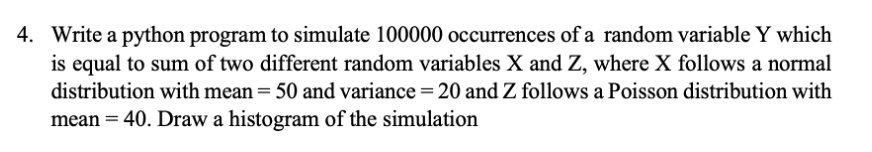

**Normal Distribution**

Random Variable X follows a Normal Distribution.

In [28]:
import math
var = 20
std = round(np.sqrt(var),2)
print('Std', std)

X_norm = np.random.normal(loc = 50, scale = std, size = 100000)
X_norm[:10]

Std 4.47


array([53.29339543, 43.75980089, 55.76445462, 52.4708985 , 49.24285479,
       52.74975762, 50.44013246, 56.52604765, 54.55239326, 49.71597008])

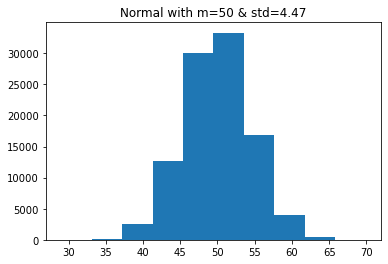

In [29]:
plt.hist(X_norm)
plt.title('Normal with m=50 & std=4.47');

**Poisson Distribution**

Random Variable Z follows a Poisson Distribution.

In [30]:
Z_poisson = np.random.poisson(40, size = 100000)
Z_poisson[:10]

array([38, 35, 37, 45, 29, 50, 43, 39, 40, 43])

In [31]:
# mean=variance for POisson Distribution
std = round(np.sqrt(40),2)
print('Std', std)

Std 6.32


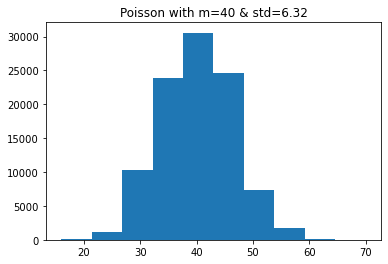

In [32]:
plt.hist(Z_poisson)
plt.title('Poisson with m=40 & std=6.32');

**Random Variable Y is sum of Random Variable X and Z**

For any two random variables X and Y, the expected value of the sum will be equal to the sum of their individual expected values.<br>
**E(X+Y)=E(X)+E(Y)**

In [33]:
# Expected values

Exp_X = 50
Exp_Z = 40

Exp_Y = Exp_X + Exp_Z
print('Mean',Exp_Y)


Mean 90


We assume X and Y to be indepdendent, we can add up variance like Expected Value.
**Var(X+Y) = Var(X) + Var(Y)**


In [34]:
Var_X = 20
Var_Z = 40
Var_Y = Var_X + Var_Z
print('Var',Var_Y)
Std_Y = round(np.sqrt(Var_Y),2)
print('Std',Std_Y)

Var 60
Std 7.75


**Simulate Random Variable Y with mean=90 and variance=7.75**

In [35]:
Y_rand = np.random.normal(loc = Exp_Y, scale = Std_Y, size = 100000)
Y_rand[:10]

array([84.90859184, 87.79649603, 88.7037787 , 75.05124731, 84.28704426,
       74.04305208, 87.37122907, 82.51435818, 91.66580286, 87.48429652])

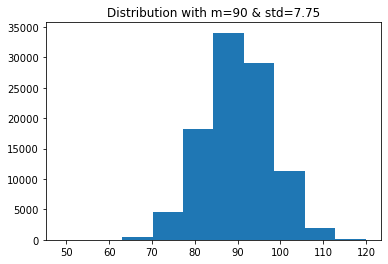

In [36]:
plt.hist(Y_rand)
plt.title('Distribution with m=90 & std=7.75');

### Question 5

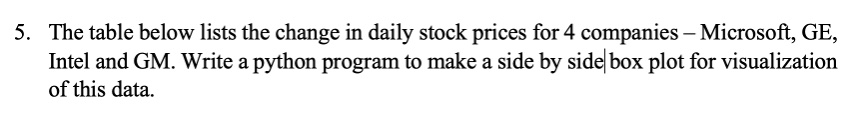

In [37]:
df_stock = pd.read_csv('stock1.csv').set_index('Date')
df_stock.head()

,Microsoft,GE,Intel,GM
Date,,,,
30-Mar-90,0.121519,0.040486,0.037267,0.022284
30-Apr-90,0.047404,-0.003890,-0.053890,-0.035420
31-May-90,0.258621,0.083516,0.221519,0.115819
29-Jun-90,0.041096,0.005445,-0.025910,-0.020570
31-Jul-90,-0.125000,0.034296,-0.053190,-0.021000


In [38]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 30-Mar-90 to nan
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Microsoft  130 non-null    float64
 1   GE         130 non-null    float64
 2   Intel      130 non-null    float64
 3   GM         130 non-null    float64
dtypes: float64(4)
memory usage: 5.1+ KB


In [39]:
df_stock.describe()

,Microsoft,GE,Intel,GM
count,130.000000,130.000000,130.000000,130.000000
mean,0.032875,0.021175,0.032085,0.009277
std,0.110267,0.063656,0.118607,0.089664
min,-0.343530,-0.136510,-0.444910,-0.240320
25%,-0.033518,-0.020505,-0.031075,-0.048580
50%,0.027150,0.012955,0.027711,-0.005425
75%,0.098179,0.064851,0.118150,0.073249
max,0.325153,0.192392,0.295267,0.276619


Using melt() function to change dataset from wide to long format - unpivoting

In [40]:
# Unpivot a DataFrame from wide to long format

df_stock_melt = pd.melt(df_stock)
df_stock_melt = df_stock_melt.rename(columns={'variable':'Stocks','value':'Price'})

df_stock_melt.head()

,Stocks,Price
0,Microsoft,0.121519
1,Microsoft,0.047404
2,Microsoft,0.258621
3,Microsoft,0.041096
4,Microsoft,-0.125000


In [41]:
df_stock_melt.tail()

,Stocks,Price
519,GM,-0.09957
520,GM,-0.04423
521,GM,-0.19517
522,GM,0.02904
523,GM,NaN


**Boxplot**

To visualize the statistical summary.

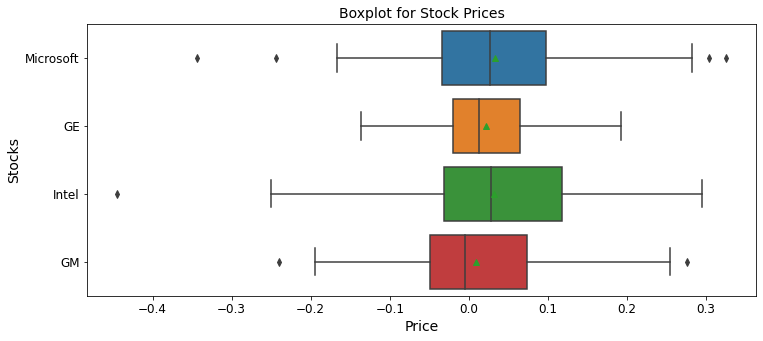

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create seaborn boxplots by stocks (categorical variable)
plt.figure(figsize=(12,5))
bp = sns.boxplot(x='Price', y='Stocks', data=df_stock_melt, orient='h', showmeans='True')
bp.set_xlabel("Price", fontsize=14)
bp.set_ylabel("Stocks", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


bp.set_title('Boxplot for Stock Prices',fontsize=14);
